In [488]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import sem, pearsonr
from scipy.optimize import curve_fit
import cv2

%matplotlib inline

import matplotlib
#style.use('classic')
matplotlib.rcParams['image.cmap'] = 'tab20'
#matplotlib.rcdefaults()

In [489]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [490]:
days = [1, 2, 3, 4, 5, 6, 7]

In [491]:
dates = [220322, 220405, 220420, 220504, 220527, 220603, 220615]

Standard error and standard deviation are both measures of variability. The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population.
Standard error indicates how different the population mean is likely to be from a sample mean. It tells you how much the sample mean would vary if you were to repeat a study using new samples from within a single population.

# GT length
Use only the lamina/blade length, as the stipe dont contribute in a significant way to the end products or the underway biomass. Maybe this is wrong?

In [492]:
lengths = [[1], [2], [3], [4], [5], [6], [7]]
lengthGT = []
lengthGTStds = []
lengthGTStes = []

for length in lengths:
    lengthPath = 'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/field/lengthBlade.csv'
    lengthBlade = np.loadtxt(lengthPath,
                             delimiter=';',
                             skiprows=1,
                             usecols={length[0]},
                             unpack=True)
    print(f'\nlengthBlade:{lengthBlade}')
    
    lengthStd = np.std(lengthBlade)
    print(f'lengthStd:{lengthStd}')
    if lengthStd is not None:
        lengthGTStds.append(lengthStd)
    
    lengthSte = sem(lengthBlade)
    print(f'lengthSte:{lengthSte}')
    if lengthSte is not None:
        lengthGTStes.append(lengthSte)
        
    lengthMean = np.around(np.mean(lengthBlade), 1)
    print(f'lengthMean:{lengthMean}')
    if lengthMean is not None:
        lengthGT.append(lengthMean)

labelGTL = 'Ground-truth length (cm)'
titleGTL = 'GTL'

print(f'\nlengthGTStds:{lengthGTStds}')
print(f'lengthGTStes:{lengthGTStes}')
print(f'lengthGT:{lengthGT}')


lengthBlade:[55.  71.  35.  23.  50.  43.5 38.  36.5 32.5 71. ]
lengthStd:15.289620662397088
lengthSte:5.09654022079903
lengthMean:45.6

lengthBlade:[58.  60.  40.5 23.5 33.  55.5 35.  57.5 59.5 42. ]
lengthStd:12.590571869458511
lengthSte:4.196857289819503
lengthMean:46.4

lengthBlade:[49.5 50.  44.  57.  42.  26.  36.5 26.5 19.  23.5]
lengthStd:12.39112585683803
lengthSte:4.1303752856126765
lengthMean:37.4

lengthBlade:[69.5 67.5 63.  43.  67.5 63.5 58.  70.5 43.  31. ]
lengthStd:13.046168019767338
lengthSte:4.3487226732557795
lengthMean:57.6

lengthBlade:[140.  82. 108.  75.  95.  75.  97.  98.  78.  87.]
lengthStd:18.725650856512303
lengthSte:6.241883618837434
lengthMean:93.5

lengthBlade:[113.  83.  57.  98. 118.  65.  98.  66.  94.  81.]
lengthStd:19.504102132628407
lengthSte:6.501367377542802
lengthMean:87.3

lengthBlade:[74. 33. 50. 51. 73. 68. 81. 56. 85. 88.]
lengthStd:16.902366698187564
lengthSte:5.6341222327291876
lengthMean:65.9

lengthGTStds:[15.289620662397088, 12.59057

# GT width

In [493]:
widths = [[1], [2], [3], [4], [5], [6], [7]]
widthGT = []
widthGTStds = []
widthGTStes = []

for width in widths:
    widthPath = 'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/field/widthBlade.csv'
    widthBlade = np.loadtxt(widthPath,
                             delimiter=';',
                             skiprows=1,
                             usecols={width[0]},
                             unpack=True)
    print(f'\nwidthBlade:{widthBlade}')
    
    widthStd = np.std(widthBlade)
    print(f'widthStd:{widthStd}')
    if widthStd is not None:
        widthGTStds.append(widthStd)
    
    widthSte = sem(widthBlade)
    print(f'widthSte:{widthSte}')
    if widthSte is not None:
        widthGTStes.append(widthSte)
        
    widthMean = np.mean(widthBlade)
    print(f'widthMean:{widthMean}')
    if widthMean is not None:
        widthGT.append(widthMean)

labelGTW = 'Ground-truth width (cm)'
titleGTW = 'GTWi'

print(f'\nwidthGTStds:{widthGTStds}')
print(f'widthGTStes:{widthGTStes}')
print(f'widthGT:{widthGT}')


widthBlade:[19.  23.   9.   6.  12.5 11.   7.5  9.   7.5 22.5]
widthStd:6.091797764207213
widthSte:2.0305992547357374
widthMean:12.7

widthBlade:[33.  31.  16.5  5.5  9.5 24.5 10.  19.5  9.5 13.5]
widthStd:9.05607530887415
widthSte:3.018691769624716
widthMean:17.25

widthBlade:[18.  14.  10.5 13.  10.   5.5  8.   8.5  7.   5.5]
widthStd:3.8078865529319543
widthSte:1.2692955176439844
widthMean:10.0

widthBlade:[21.  15.  20.  10.  20.  27.5 20.5 21.   9.5 10.5]
widthStd:5.670097000933935
widthSte:1.8900323336446447
widthMean:17.5

widthBlade:[40. 25. 34. 26. 37. 18. 41. 24. 22. 19.]
widthStd:8.200000000000001
widthSte:2.7333333333333334
widthMean:28.6

widthBlade:[38. 22. 12. 29. 43. 20. 29. 18. 22. 28.]
widthStd:8.84816365128946
widthSte:2.9493878837631526
widthMean:26.1

widthBlade:[18. 11.  9. 11. 17. 19. 20. 13. 33. 18.]
widthStd:6.503076195155644
widthSte:2.167692065051881
widthMean:16.9

widthGTStds:[6.091797764207213, 9.05607530887415, 3.8078865529319543, 5.670097000933935, 8.20

# IJ length

In [494]:
lengths = [[1], [2], [3], [4], [5], [6], [7]]
lengthIJ = []
lengthIJStds = []
lengthIJStes = []

for length in lengths:
    lengthPath = 'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/field/lengthImageJ.csv'
    lengthImageJ = np.loadtxt(lengthPath,
                             delimiter=';',
                             skiprows=1,
                             usecols={length[0]},
                             unpack=True)
    print(f'\nlengthImageJ:{lengthImageJ}')
    
    lengthStd = np.around(np.std(lengthImageJ), 4)
    print(f'lengthStd:{lengthStd}')
    if lengthStd is not None:
        lengthIJStds.append(lengthStd)
        
    lengthSte = np.around(sem(lengthImageJ), 4)
    print(f'lengthSte:{lengthSte}')
    if lengthSte is not None:
        lengthIJStes.append(lengthSte)
        
    lengthMean = np.around(np.mean(lengthImageJ), 4)
    print(f'lengthMean:{lengthMean}')
    if lengthMean is not None:
        lengthIJ.append(lengthMean)

labelIJL = 'Manual annotation length (cm)'
titleIJL = 'MAL'

print(f'\nlengthIJStds:{lengthIJStds}')
print(f'lengthIJStes:{lengthIJStes}')
print(f'lengthIJ:{lengthIJ}')


lengthImageJ:[26.4639 27.9279 27.6616 39.8273 41.99   39.4829]
lengthStd:6.6034
lengthSte:2.9531
lengthMean:33.8923

lengthImageJ:[38.6595 36.1716 38.5839 40.1247 39.6592 45.3074]
lengthStd:2.7805
lengthSte:1.2435
lengthMean:39.751

lengthImageJ:[36.9594 35.1107 30.3894 37.3418 45.3181 38.3608]
lengthStd:4.4359
lengthSte:1.9838
lengthMean:37.2467

lengthImageJ:[50.2789 59.6825 51.4848 37.1885 57.294  65.2162]
lengthStd:8.8542
lengthSte:3.9597
lengthMean:53.5242

lengthImageJ:[ 77.5372 101.4532 103.6875  94.2895  95.3201 101.6478]
lengthStd:8.7966
lengthSte:3.934
lengthMean:95.6559

lengthImageJ:[106.3151  99.0354  85.4701 112.5269  70.1498  89.4897]
lengthStd:14.0358
lengthSte:6.277
lengthMean:93.8312

lengthImageJ:[72.7977 69.2933 67.0274 81.1869 77.1586 72.2067]
lengthStd:4.7247
lengthSte:2.1129
lengthMean:73.2784

lengthIJStds:[6.6034, 2.7805, 4.4359, 8.8542, 8.7966, 14.0358, 4.7247]
lengthIJStes:[2.9531, 1.2435, 1.9838, 3.9597, 3.934, 6.277, 2.1129]
lengthIJ:[33.8923, 39.751, 37.2

lengthGT: 45.6, 46.4, 37.4, 57.6, 93.5, 87.3, 65.9

# CV area

In [495]:
areas = [[1], [2], [3], [4], [5], [6], [7]]
areaCV = []
areaStds = []

for area in areas:
    areaPath = f'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/output/{area[0]}/areaDay{area[0]}.csv'
    sample, areaPixel, areaCm = np.loadtxt(areaPath, 
                                           dtype=int, 
                                           delimiter=',', 
                                           
                                           skiprows=1, 
                                           unpack=True)
    print(f'\nareaCm:{areaCm}')
    
    areaDm = areaCm/100
    print(f'\areaDM:{areaDm}')
    
    areaStd = np.std(areaDm)
    print(f'areaStd:{areaStd}')
    if areaStd is not None:
        areaStds.append(areaStd)
        
    areaMean = np.mean(areaDm)
    print(f'areaMean:{areaMean}')
    if areaMean is not None:
        areaCV.append(areaMean)

labelCVA = 'Computer vision area (dm² m⁻¹)'
titleCVA = 'CVA'

print(f'\nareaStds:{areaStds}')
print(f'areaCV:{areaCV}')


areaCm:[3073 3204 3800 3872 4226 4912]
reaDM:[30.73 32.04 38.   38.72 42.26 49.12]
areaStd:6.1822606886334235
areaMean:38.47833333333333

areaCm:[5019 4562 5316 4146 4323 4071]
reaDM:[50.19 45.62 53.16 41.46 43.23 40.71]
areaStd:4.560553389910287
areaMean:45.72833333333333

areaCm:[3617 3268 2699 3305 3165 3242]
reaDM:[36.17 32.68 26.99 33.05 31.65 32.42]
areaStd:2.7141358354609553
areaMean:32.16

areaCm:[4342 4730 4587 4675 5078 4915]
reaDM:[43.42 47.3  45.87 46.75 50.78 49.15]
areaStd:2.3412205980831637
areaMean:47.211666666666666

areaCm:[8600 7956 8050 7692 7084 8213]
reaDM:[86.   79.56 80.5  76.92 70.84 82.13]
areaStd:4.683993132645121
areaMean:79.325

areaCm:[8342 8554 7793 8565 6091 6955]
reaDM:[83.42 85.54 77.93 85.65 60.91 69.55]
areaStd:9.165690857152502
areaMean:77.16666666666667

areaCm:[4100 4156 3348 3389 2491 3902]
reaDM:[41.   41.56 33.48 33.89 24.91 39.02]
areaStd:5.7454523078885815
areaMean:35.64333333333334

areaStds:[6.1822606886334235, 4.560553389910287, 2.

lengthGT: 45.6, 46.4, 37.4, 57.6, 93.5, 87.3, 65.9

# Pred biomass

In [496]:
biomassPred = [0.389, 0.611, 0.262, 0.671, 5.023, 4.403, 0.324]

# Accuracy

In [497]:
accs = []
for area, length in zip(areaCV, lengthGT):
    acc = ((length-(length-area))/length)*100
    accs.append(acc)
    print(acc)

84.38230994152046
98.55244252873563
85.98930481283422
81.96469907407406
84.83957219251337
88.39251622756778
54.087000505816896


# GT wet weight

In [498]:
weightPath = f'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/field/weight.csv'
days, weightGT = np.loadtxt(weightPath,
                            delimiter=';',
                            skiprows=1,
                            unpack=True)

labelGTWW = 'Ground-truth weight (kg m⁻¹)'
titleGTWW = 'GTW'
print(f'weightGT:{weightGT}')

weightGT:[0.428 0.54  0.238 0.768 4.37  4.966 1.844]


# Scatter plot

In [499]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def makeSPlot(x, y, days, xlabel, ylabel, xtitle, ytitle):

    # define input data as numpy array
    x = np.array(x).reshape((-1,1))
    y = np.array(y)
    c = np.array(days)

    # perform linear regression and make predictions
    model = LinearRegression().fit(x, y)
    yPred = model.predict(x)

    # find r2, intercept and slope
    r2 = model.score(x, y)
    intercept = model.intercept_
    slope = np.float64(model.coef_)

    # make scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=c)

    # produce a legend with the unique colors from the scatter
    ax.legend(*scatter.legend_elements(), title="Day", loc='lower right')
    
    # add trendline to the plot
    ax.plot(x, yPred)
    
    # add trendline equation and r2 to plot
    ax.text(.02,.98, f'y = {slope:.2f}x + {intercept:.2f}', ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.92, f'r2 = {r2:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    # label the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # give title
    plt.title(f'{xtitle} and {ytitle}')
    
    # save plot
    plt.savefig(f'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/{xlabel}vs{ylabel}.jpg', bbox_inches='tight')
    
    # display plot
    plt.show;
    
    return r2

# Exponential regression

In [500]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def makeSPlot(x, y, days, xlabel, ylabel, xtitle, ytitle):

# Step 2a: Provide data
    x = np.array(x).reshape((-1,1))
    y = np.array(y)

# Step 2b: Transform input data
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
    model = LinearRegression().fit(x_, y)

# Step 4: Get results
    r2 = model.score(x_, y)
    print(f'r2: {r2}')
    intercept, coef = model.intercept_, model.coef_
    print(f"intercept: {intercept}")
    print(f"coefficients: {coef}")

# Step 5: Predict response
    yPred = model.predict(x_)

In [501]:
def exp(x, y):
    x = np.array(x)
    y = np.array(y)
    
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    
    y_predicted = poly_reg_model.predict(poly_features)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.plot(x, y_predicted)
    plt.show()
    
    return None

In [502]:
def expPlot(x, y, xerr, yerr, days, xlabel, ylabel, xtitle, ytitle):

    # define input data as numpy array
    xErr = np.array(x)
    yErr = np.array(y)
    x = np.array(x).reshape((-1,1))
    y = np.array(y).reshape((-1,1))
    c = np.array(days)
    if xerr is not None:
        xerr = np.array(xerr)
    if yerr is not None:
        yerr = np.array(yerr)
    
    # Transform input data
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    
    # Create a model and fit it
    model = LinearRegression().fit(x_, y)
    
    # Get coefficients and intercept of polynomial regression model
    coef1 = model.coef_[0][1]
    coef2 = model.coef_[0][2]
    intercept = model.intercept_[0]

    # Create x and y values for plotting
    xPlot = np.linspace(x.min(), x.max(), 100)
    yPlot = coef2 * xPlot**2 + coef1 * xPlot + intercept
    
    # Calculate the correlation coefficient (r), p-value and r squared
    r, p = pearsonr(xErr, yErr)
    r2 = np.square(r)
    
    # make scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=c)
    ax.errorbar(xErr, yErr, xerr=xerr, yerr=yerr, linestyle='None', elinewidth=1, capsize=3)

    # produce a legend with the unique colors from the scatter
    ax.legend(*scatter.legend_elements(), title="Day", loc='lower right')
    
    # add trendline to the plot
    ax.plot(xPlot, yPlot)
    
    # add trendline equation and r2 to plot
    #ax.text(.02,.98, f'y = {slope:.2f}x + {intercept:.2f}', ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.98, f'r = {r:.4f}', ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.94, f'p = {p:.4f}', ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.90, f'r2 = {r2:.4f}', ha='left', va='top', transform=ax.transAxes)
    
    # label the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    matplotlib.rcParams.update({'font.size': 14})
    
    # give title
    #plt.title(f'{xtitle} and {ytitle}')
    
    # save plot
    #plt.savefig(f'C:/Users/marti/opencv/monitare/plots/{xlabel}vs{ylabel}.jpg', bbox_inches='tight')
    
    # display plot
    plt.show;
    
    return None

# ScipyPlot

In [503]:
def scipyPlot(x, y, xerr, yerr, days, xlabel, ylabel, xtitle, ytitle):

    xData = np.array(x)
    yData = np.array(y)
    c = np.array(days)
    if xerr is not None:
        xerr = np.array(xerr)
    if yerr is not None:
        yerr = np.array(yerr)

    def func(x, a, b):
        return np.exp(a) * np.exp(b*x)
    
    yLog = np.log(yData)
    b, a = np.polyfit(xData, yLog, 1)

    xdata = np.linspace(xData.min(), xData.max(), 50)
    y = func(xdata, a, b)
    rng = np.random.default_rng()
    y_noise = 0.2 * rng.normal(size=xdata.size)
    ydata = y + y_noise
    
    popt, pcov = curve_fit(func, xdata, ydata)
    
    r, p = pearsonr(xData, yData)
    r2 = np.square(r)
    
    GTWpred = [0.389, 0.611, 0.262, 0.671, 5.023, 4.403, 0.324]
    MSE = mean_squared_error(yData, GTWpred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(yData, GTWpred)
    #r22 = r2_score(ydata, func(xdata, *popt))
    
    # make scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(xData, yData, c=c)
    ax.errorbar(xData, yData, xerr=xerr, yerr=yerr, linestyle='None', elinewidth=1, capsize=3)

    # produce a legend with the unique colors from the scatter
    ax.legend(*scatter.legend_elements(), title="Date", loc='lower right')
    
    # add trendline to the plot
    ax.plot(xdata, func(xdata, *popt))
    
    A = f'{np.exp(a):.4f}'
    B = f'{b:.4f}x'
    
    # add trendline equation and r2 to plot
    #ax.text(.02,.98, f'y = {slope:.2f}x + {intercept:.2f}', ha='left', va='top', transform=ax.transAxes)
    #ax.text(.02,.94, f'r = {r:.2f}', ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.98, r'y = {0}$e^{{{1}}}$'.format(A, B), ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.93, f'$r^2$ = {r2:.2f}', ha='left', va='top', transform=ax.transAxes)
    if p < 0.05:
        ax.text(.02,.88, f'p < 0.05', ha='left', va='top', transform=ax.transAxes)
    else:
        ax.text(.02,.88, f'p = {p:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    # label the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    matplotlib.rcParams.update({'font.size': 14})
    
    # give title
    #plt.title(f'{xtitle} and {ytitle}')
    
    # save plot
    plt.savefig(f'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/{xtitle}vs{ytitle}_300dpi.jpg', dpi=300, bbox_inches='tight')
    
    # display plot
    plt.show;
    
    return MSE, RMSE, MAE

## Scipy black

In [510]:
def scipyBlack(x, y, xerr, yerr, days, xlabel, ylabel, xtitle, ytitle):

    xData = np.array(x)
    yData = np.array(y)
    c = np.array(days)
    if xerr is not None:
        xerr = np.array(xerr)
    if yerr is not None:
        yerr = np.array(yerr)

    def func(x, a, b):
        return np.exp(a) * np.exp(b*x)
    
    yLog = np.log(yData)
    b, a = np.polyfit(xData, yLog, 1)

    xdata = np.linspace(xData.min(), xData.max(), 50)
    y = func(xdata, a, b)
    rng = np.random.default_rng()
    y_noise = 0.2 * rng.normal(size=xdata.size)
    ydata = y + y_noise
    
    popt, pcov = curve_fit(func, xdata, ydata)
    
    r, p = pearsonr(xData, yData)
    r2 = np.square(r)
    
    GTWpred = [0.389, 0.611, 0.262, 0.671, 5.023, 4.403, 0.324]
    MSE = mean_squared_error(yData, GTWpred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(yData, GTWpred)
    #r22 = r2_score(ydata, func(xdata, *popt))
    
    colors = ['b','g','r','c','m','y','k']
    
    # make scatter plot
    fig, ax = plt.subplots()
    lo = ax.scatter(xData[0], yData[0], marker='x', color=colors[0])
    ll = ax.scatter(xData[1], yData[1], marker='o', color=colors[1])
    l  = ax.scatter(xData[2], yData[2], marker='v', color=colors[2])
    aa = ax.scatter(xData[3], yData[3], marker='^', color=colors[3])
    h  = ax.scatter(xData[4], yData[4], marker='s', color=colors[4])
    hh = ax.scatter(xData[5], yData[5], marker='d', color=colors[5])
    ho = ax.scatter(xData[6], yData[6], marker='P', color=colors[6])

    ax.legend((lo, ll, l, aa, h, hh, ho),
              ('March 22', 'April 5', 'April 20', 'May 4', 'May 27', 'June 3', 'June 15'),
              scatterpoints=1,
              title="Date",
              loc='lower right',
              fontsize=10)
    
    #scatter = ax.scatter(xData, yData, c=c)
    ax.errorbar(xData, yData, xerr=xerr, yerr=yerr, linestyle='None', elinewidth=1, capsize=3, color='k')

    # produce a legend with the unique colors from the scatter
    #ax.legend(*scatter.legend_elements(), title="Date", loc='lower right')
    
    # add trendline to the plot
    ax.plot(xdata, func(xdata, *popt), color='k')
    
    A = f'{np.exp(a):.4f}'
    B = f'{b:.4f}x'
    
    # add trendline equation and r2 to plot
    ax.text(.02,.98, r'y = {0}$e^{{{1}}}$'.format(A, B), ha='left', va='top', transform=ax.transAxes)
    
    ax.text(.02,.93, f'$r^2$ = {r2:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    if p < 0.05:
        ax.text(.02,.88, f'p < 0.05', ha='left', va='top', transform=ax.transAxes)
    else:
        ax.text(.02,.88, f'p = {p:.2f}', ha='left', va='top', transform=ax.transAxes)
        
    ax.text(.5,.98, 'a)', fontsize=20, ha='right', va='top', transform=ax.transAxes)
    
    # label the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    matplotlib.rcParams.update({'font.size': 14})
    
    # give title
    #plt.title(f'{xtitle} and {ytitle}')
    
    # save plot
    plt.savefig(f'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/{xtitle}vs{ytitle}_300dpi_black.jpg', dpi=300, bbox_inches='tight')
    
    # display plot
    plt.show;
    
    return MSE, RMSE, MAE

# Errorbar plot

In [514]:
def makePlot(x, y, xerr, yerr, days, xlabel, ylabel, xtitle, ytitle):

    # define input data as numpy array
    xErr = np.array(x)
    x = np.array(x).reshape((-1,1))
    y = np.array(y)
    c = days
    if xerr is not None:
        xerr = np.array(xerr)
    if yerr is not None:
        yerr = np.array(yerr)
    
    # perform linear regression and make predictions
    model = LinearRegression().fit(x, y)
    yPred = model.predict(x)

    # find r2, MSE, intercept and slope
    r2 = model.score(x, y)
    MSE = mean_squared_error(y, yPred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y, yPred)
    intercept = model.intercept_
    slope = np.float64(model.coef_)
    
    # Calculate the correlation coefficient and p-value
    r, p = pearsonr(xErr, y)

    dates =['March 22', 'April 5', 'April 20', 'May 4', 'May 27', 'June 3', 'June 15']
    colors = ['b','g','r','c','m','y','k']
    
    # make scatter plot
    fig, ax = plt.subplots()
    lo = ax.scatter(x[0], y[0], marker='x', color=colors[0])
    ll = ax.scatter(x[1], y[1], marker='o', color=colors[1])
    l  = ax.scatter(x[2], y[2], marker='v', color=colors[2])
    a  = ax.scatter(x[3], y[3], marker='^', color=colors[3])
    h  = ax.scatter(x[4], y[4], marker='s', color=colors[4])
    hh = ax.scatter(x[5], y[5], marker='d', color=colors[5])
    ho = ax.scatter(x[6], y[6], marker='P', color=colors[6])

    ax.legend((lo, ll, l, a, h, hh, ho),
              ('March 22', 'April 5', 'April 20', 'May 4', 'May 27', 'June 3', 'June 15'),
              scatterpoints=1,
              title="Date",
              loc='lower right',
              fontsize=10)
    
    #for color, date in zip(colors, dates):
    #    scatter = ax.scatter(x, y, c=color, label=date)
    ax.errorbar(xErr, y, xerr=xerr, yerr=yerr, linestyle='None', elinewidth=1, capsize=3, ecolor='k')

    # produce a legend with the unique colors from the scatter
    #ax.legend(*scatter.legend_elements(), title="Date", loc='lower right')
    
    # add trendline to the plot
    ax.plot(x, yPred, color='k')
    
    # add trendline equation and r2 to plot
    if intercept > 0:
        ax.text(.02,.98, f'y = {slope:.2f}x + {intercept:.2f}', ha='left', va='top', transform=ax.transAxes)
    else:
        ax.text(.02,.98, f'y = {slope:.2f}x {intercept:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    ax.text(.02,.93, f'$r^2$ = {r2:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    if p < 0.05:
        ax.text(.02,.88, f'p < 0.05', ha='left', va='top', transform=ax.transAxes)
    else:
        ax.text(.02,.88, f'p = {p:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    ax.text(.50,.98, 'c)', fontsize=20, ha='right', va='top', transform=ax.transAxes)
    
    # label the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    matplotlib.rcParams.update({'font.size': 14})
    
    # give title
    #plt.title(f'{xtitle} and {ytitle}')
    
    # save plot
    plt.savefig(f'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/{xtitle}vs{ytitle}_600dpi_black.jpg', dpi=600, bbox_inches='tight')
    
    # display plot
    plt.show;
    
    return

# Errorbar plot 6

In [515]:
def makePlot6(x, y, xerr, yerr, days, xlabel, ylabel, xtitle, ytitle):

    # define input data as numpy array
    xErr = np.array(x)
    x = np.array(x).reshape((-1,1))
    y = np.array(y)
    c = days
    if xerr is not None:
        xerr = np.array(xerr)
    if yerr is not None:
        yerr = np.array(yerr)
    
    # perform linear regression and make predictions
    model = LinearRegression().fit(x, y)
    yPred = model.predict(x)

    # find r2, MSE, intercept and slope
    r2 = model.score(x, y)
    MSE = mean_squared_error(y, yPred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y, yPred)
    intercept = model.intercept_
    slope = np.float64(model.coef_)
    
    # Calculate the correlation coefficient and p-value
    r, p = pearsonr(xErr, y)

    dates =['March 22', 'April 5', 'April 20', 'May 4', 'May 27', 'June 3']
    colors = ['b','g','r','c','m','y','k']
    
    # make scatter plot
    fig, ax = plt.subplots()
    lo = ax.scatter(x[0], y[0], marker='x', color=colors[0])
    ll = ax.scatter(x[1], y[1], marker='o', color=colors[1])
    l  = ax.scatter(x[2], y[2], marker='v', color=colors[2])
    a  = ax.scatter(x[3], y[3], marker='^', color=colors[3])
    h  = ax.scatter(x[4], y[4], marker='s', color=colors[4])
    hh = ax.scatter(x[5], y[5], marker='d', color=colors[5])
    #ho = plt.scatter(x[6], y[6], marker='P', color=colors[6])

    ax.legend((lo, ll, l, a, h, hh),
              ('March 22', 'April 5', 'April 20', 'May 4', 'May 27', 'June 3'),
              scatterpoints=1,
              title="Date",
              loc='lower right',
              fontsize=10)
    
    #for color, date in zip(colors, dates):
    #    scatter = ax.scatter(x, y, c=color, label=date)
    ax.errorbar(xErr, y, xerr=xerr, yerr=yerr, linestyle='None', elinewidth=1, capsize=3, ecolor='k')

    # produce a legend with the unique colors from the scatter
    #ax.legend(*scatter.legend_elements(), title="Date", loc='lower right')
    
    # add trendline to the plot
    ax.plot(x, yPred, color='k')
    
    matplotlib.rcParams.update({'font.size': 14})
    
    # add trendline equation and r2 to plot
    if intercept > 0:
        ax.text(.02,.98, f'y = {slope:.2f}x + {intercept:.2f}', ha='left', va='top', transform=ax.transAxes)
    else:
        ax.text(.02,.98, f'y = {slope:.2f}x {intercept:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    ax.text(.02,.93, f'$r^2$ = {r2:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    if p < 0.05:
        ax.text(.02,.88, f'p < 0.05', ha='left', va='top', transform=ax.transAxes)
    else:
        ax.text(.02,.88, f'p = {p:.2f}', ha='left', va='top', transform=ax.transAxes)
    
    #ax.text(.50,.98, 'd)', fontsize=20, ha='right', va='top', transform=ax.transAxes)
    
    # label the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
    
    # give title
    #plt.title(f'{xtitle} and {ytitle}')
    
    # save plot
    plt.savefig(f'C:/Users/glauciaf/Dropbox/NTNU/MoniTARE/Master_students/Martin_Overrein/monitare/{xtitle}vs{ytitle}_600dpi_black.jpg', dpi=600, bbox_inches='tight')
    
    # display plot
    plt.show;
    
    return

## GTL vs MAL

TypeError: cannot unpack non-iterable NoneType object

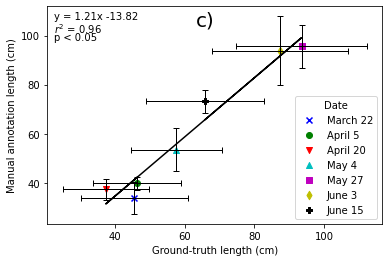

In [516]:
r2, r, p, MSE, RMSE, MAE =  makePlot(lengthGT, lengthIJ, lengthGTStds, lengthIJStds, dates, labelGTL, labelIJL, titleGTL, titleIJL)

## GTL vs CVA

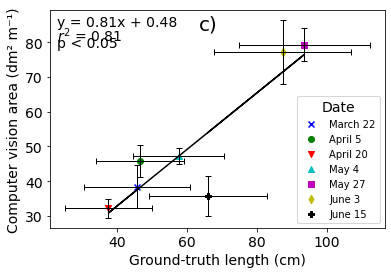

In [482]:
CVAvsGTL =  makePlot(lengthGT, areaCV, lengthGTStds, areaStds, dates,  labelGTL, labelCVA, titleGTL, titleCVA)


## GT length CV area vs exp without outlier day 7

In [483]:
lengthGT2 = [45.6, 46.4, 37.4, 57.6, 93.5, 87.3]
lengthGTStds2 = [15.289620662397088, 12.590571869458511, 12.39112585683803, 13.046168019767338, 18.725650856512303, 19.504102132628407]

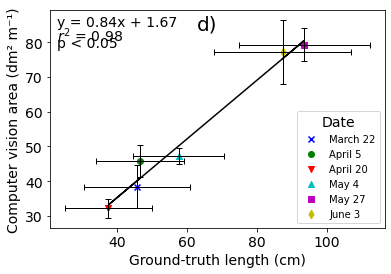

In [484]:
CVAvsGTL =  makePlot6(lengthGT2, areaCV2, lengthGTStds2, areaStds2, dates2, labelGTL, labelCVA,  'CVA2', 'GTL2')

## GT wet weight exp vs CV area

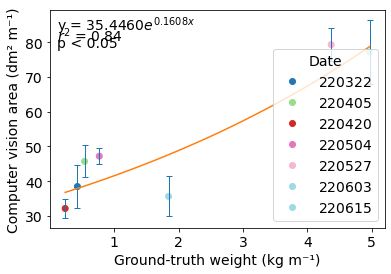

In [485]:
MSE, RMSE, MAE = scipyPlot(weightGT, areaCV,  None, areaStds, dates,  labelGTWW, labelCVA, titleGTWW, titleCVA )

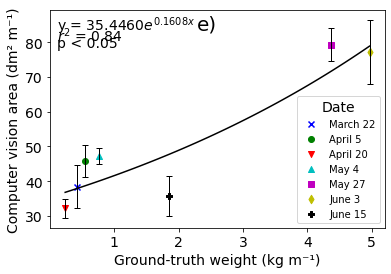

In [486]:
MSE, RMSE, MAE = scipyBlack(weightGT, areaCV,  None, areaStds, dates, labelGTWW, labelCVA, titleGTWW, titleCVA)

## CV area vs GT wet weight exp without outlier day 7

In [487]:
areaCV2 = [38.47833333333333, 45.72833333333333, 32.16, 47.211666666666666, 79.325, 77.16666666666667]
areaStds2 = [6.1822606886334235, 4.560553389910287, 2.7141358354609553, 2.3412205980831637, 4.683993132645121, 9.165690857152502]
weightGT2 = [0.428, 0.54, 0.238, 0.768, 4.37, 4.966]
biomassPred2 = [0.389, 0.611, 0.262, 0.671, 5.023, 4.403]
dates2 = [220322, 220405, 220420, 220504, 220527, 220603]

In [477]:
MSE, RMSE, MAE = scipyBlack(weightGT2, areaCV2, None, areaStds2, dates2, labelGTWW, labelCVA, 'GTW2',  'CVA2')
print(MSE, RMSE, MAE)

ValueError: Found input variables with inconsistent numbers of samples: [6, 7]

## GTWvsPredB

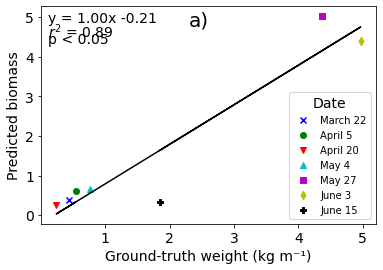

In [425]:
GTWvsPredB =  makePlot(weightGT, biomassPred, None, None, dates, labelGTWW, 'Predicted biomass', 'GTW', 'PredB')

IndexError: index 6 is out of bounds for axis 0 with size 6

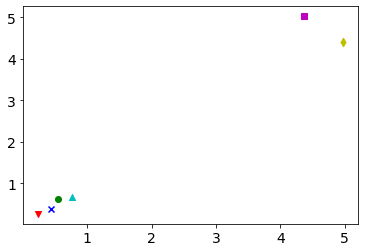

In [426]:
GTWvsPredB2 =  makePlot(weightGT2, biomassPred2, None, None, dates2, labelGTWW, 'Predicted biomass', 'GTW2', 'PredB2')

## MALvsGTW

0.4386178571428571 0.6622823092479951 0.4238571428571429


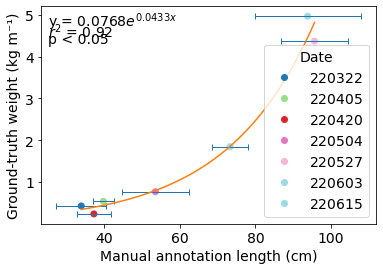

In [427]:
MSE, RMSE, MAE = scipyPlot(lengthIJ, weightGT, lengthIJStds, None, dates, labelIJL, labelGTWW, titleIJL, titleGTWW)
print(MSE, RMSE, MAE)

## GT length vs GT width

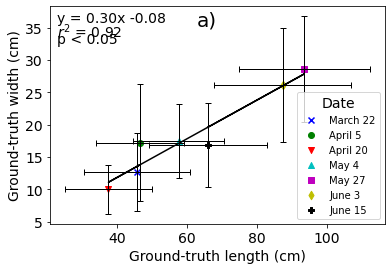

In [428]:
GTLvsGTW = makePlot(lengthGT, widthGT, lengthGTStds, widthGTStds, dates, labelGTL, labelGTW, titleGTL, titleGTW)

## GT length vs GT wet weight

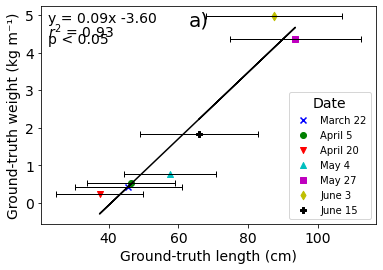

In [429]:
GTL_vs_GTWW = makePlot(lengthGT, weightGT, lengthGTStds, None, days, labelGTL, labelGTWW, titleGTL, titleGTWW)

## GT width vs GT wet weigth

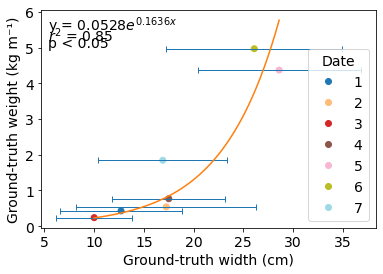

In [430]:
GTW_vs_GTWW = scipyPlot(widthGT, weightGT, widthGTStds, None, days, labelGTW, labelGTWW, titleGTW, titleGTWW)

## GT length vs GT wet weight expReg

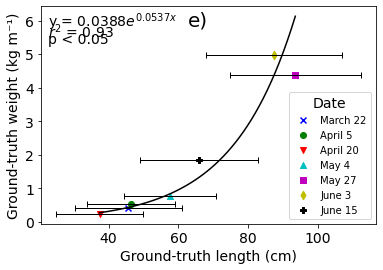

In [431]:
GTLvsGTW = scipyBlack(lengthGT, weightGT, lengthGTStds, None, dates, labelGTL, labelGTWW, titleGTL, titleGTWW)

## GT wet weight vs CV area

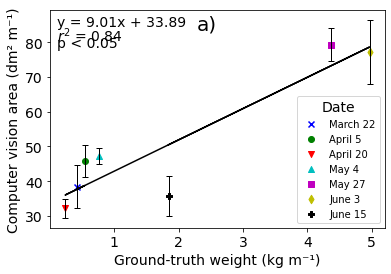

In [432]:
GTWW_vs_CVA =  makePlot(weightGT, areaCV, None, areaStds, days, labelGTWW, labelCVA, titleGTWW, titleCVA)

## GT length vs CV length

In [294]:
GTL_vs_CVL =  makePlot(lengthGT, lengthCV, lengthGTStds, None, days, labelGTL, labelCVL, titleGTL, titleCVL)

NameError: name 'lengthCV' is not defined

It was planned to apply the same MS tuning parameters on all images all days, with the goal of defining a method applicable to all conditions. That however, proved impossible, as the individual conditions per day demaned vastly different MS tuning, as well as color segmentation thresholds.
Had the same MS tuning been applied on all days, it would be possible to use different tunings, and then investigate how different tuning correlate with the correlation coefisient between GT and CV. I can still do this tho. I can compare e.g. 0.02 and 0.05. This is my opinion beyond, or maybe even besides, the scope of this study. This is not a thesis about the intricasies of Meanshift segmenting.

Can I find a correlation between turbidity and quality of the estimations? I have turbidity measurements for each day. The question is what is a good quality measure. Stdev/error? mean_square_error?

In [295]:
turb = [0.07, 0.08, 0.22, 0.19, 0.09, 0.07, 0.06]

In [117]:
turb1 = [0.039644, 0.05565, 0.283405455, 0.206548571, 0.062981667, 0.054696, 0.05777]

In [118]:
print(accs)

[84.38230994152046, 98.55244252873563, 85.98930481283422, 81.96469907407406, 84.83957219251337, 88.39251622756778, 54.087000505816896]


In [119]:
SqEs = []
for pred, weight in zip(biomassPred, weightGT):
    SqE = np.square(weight-pred)
    SqEs.append(SqE)
    print(SqE)

Res = []
for pred, weight in zip(biomassPred, weightGT):
    Re = weight-pred
    Res.append(Re)
    print(Re)

0.0015209999999999983
0.005040999999999993
0.000576000000000001
0.009408999999999995
0.4264089999999994
0.31696900000000067
2.3104
0.03899999999999998
-0.07099999999999995
-0.02400000000000002
0.09699999999999998
-0.6529999999999996
0.5630000000000006
1.52


In [120]:
#MSE1 = [1.90504633, 15.25140179, -12.04575618, 13.56418858, 7.65571758, -1.8839605, -41.68048636]

In [121]:
MSE1 = [7.0000e-04, 8.5900e-01, 5.4000e-03, 6.5210e-01, 5.8000e-03, 2.5140e-01,
 1.5955e+00]

In [122]:
MAE1 = [0.0272, 0.9268, 0.0735, 0.8075, 0.0765, 0.5014, 1.2631]

In [123]:
# Uten dag 3 og 4 (outliers)
MAE2 = [0.0272, 0.9268, 0.0765, 0.5014, 1.2631]
MSE2 = [7.0000e-04, 8.5900e-01, 5.8000e-03, 2.5140e-01, 1.5955e+00]
days2 = [1, 2, 3, 4, 5]
turb2 = [0.039644, 0.05565, 0.062981667, 0.054696, 0.05777]
accs2 = [84.38230994152046, 98.55244252873563, 84.83957219251337, 88.39251622756778, 54.087000505816896]

In [124]:
# Uten dag 7 (outlier)
days3 = [1,2,3,4,5,6]
accs3 = [84.38230994152046, 98.55244252873563, 85.98930481283422, 81.96469907407406, 84.83957219251337, 88.39251622756778]
turb3 = [0.039644, 0.05565, 0.283405455, 0.206548571, 0.062981667, 0.054696]

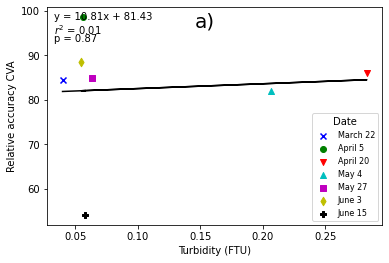

In [125]:
turbvsaccs = makePlot(turb1, accs, None, None, dates, 'Turbidity (FTU)', 'Relative accuracy CVA', 'Turb', 'accCVA')

IndexError: index 5 is out of bounds for axis 0 with size 5

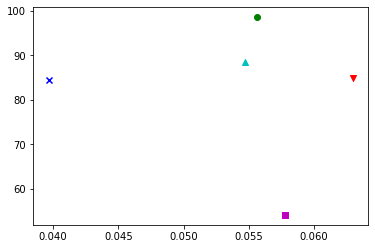

In [126]:
turbvsaccs2 = makePlot(turb2, accs2, None, None, days2, 'Turbidity (FTU)', 'Relative accuracy CVA', 'Turb', 'accCVA')

IndexError: index 6 is out of bounds for axis 0 with size 6

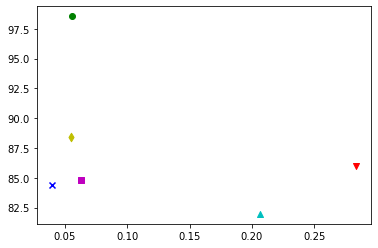

In [127]:
turbvsaccs3 = makePlot(turb3, accs3, None, None, days3, 'Turbidity (FTU)', 'Relative accuracy CVA', 'Turb', 'accCVA')

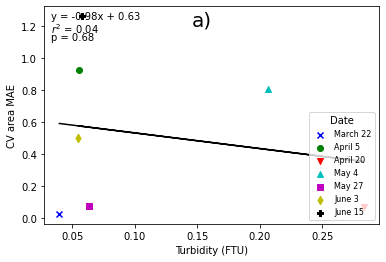

In [128]:
turbvsMAE1 = makePlot(turb1, MAE1, None, None, dates, 'Turbidity (FTU)', 'CV area MAE', 'Turb', 'CVareaMAE')

IndexError: index 5 is out of bounds for axis 0 with size 5

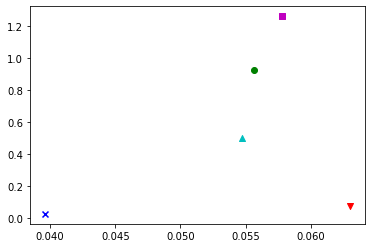

In [129]:
turbvsMAE2 = makePlot(turb2, MAE2, None, None, days2, 'Turbidity (FTU)', 'CV area MAE', 'Turb', 'CVareaMAE')

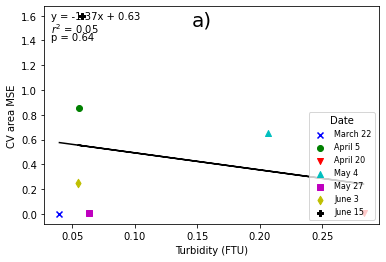

In [130]:
turbvsMSE1 = makePlot(turb1, MSE1, None, None, dates, 'Turbidity (FTU)', 'CV area MSE', 'Turb', 'CVareaMSE')

IndexError: index 5 is out of bounds for axis 0 with size 5

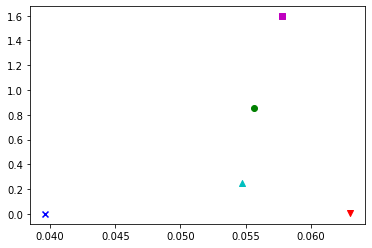

In [131]:
turbvsMSE2 = makePlot(turb2, MSE2, None, None, days2, 'Turbidity (FTU)', 'CV area MSE', 'Turb', 'CVareaMSE')

In [132]:
chl_vs_CVA = makePlot(chl, areaStds, None, None, days, 'FChl a (mg m3)', 'Area ST.D', 'FChl a', 'Area ST.D')

NameError: name 'chl' is not defined